In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from src.loaders import load_data, load_labels
from src.classify import MCM_Classifier
import os
import src.plot as myplot


In [2]:
# Customizable environment variables
n_categories = 10  # Number of categories to be classified
n_variables = 121  # Number of variables in the dataset
mcm_filename_format = "train-images-unlabeled-{}_comms.dat"
data_filename_format = "train-images-unlabeled-{}.dat"
data_path = "../INPUT/data/"
communities_path = "../INPUT/MCMs/"
output_path = "../OUTPUT/"

In [3]:
print("{:-^50}".format("  MCM-Classifier  ")) 

test_data = load_data("../INPUT/data/test-images-unlabeled-all-uniform.txt").astype(int)
test_labels = load_labels("../INPUT/data/test-labels-uniform.txt").astype(int)

# Step 1: Initialize classifier
classifier = MCM_Classifier(n_categories, n_variables, mcm_filename_format, data_filename_format, data_path, communities_path)

# Step 2: Train
classifier.fit(greedy=True, max_iter=1000000, max_no_improvement=100000)


# Step 3: Evaluate
predicted_classes, probs = classifier.predict(test_data, test_labels)

# Step 4: Save classification report and other stats
# report = classifier.get_classification_report(test_labels)
classifier.save_classification_report(test_labels,path=output_path)

if (classifier.stats == None):
    raise Exception("Classifier stats not found. Did you forget to call predict()?")


----------------  MCM-Classifier  ----------------
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
--------------------------------------------------
--  Running MinCompSpin_SimulatedAnnealing...  ---
--------------------------------------------------

✓ SAA for train-images-unlabeled-0_bootstrap finished successfully
✓ SAA for train-images-unlabeled-1_bootstrap finished successfully
✓ SAA for train-images-unlabeled-2_bootstrap finished successfully
✓ SAA for train-images-unlabeled-3_bootstrap finished successfully
✓ SAA for train-images-unlabeled-4_bootstrap finished successfully
✓ SAA for train-images-unlabeled-5_bootstrap finished successfully
✓ SAA for tra

In [24]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/bin/../src/plot.py'>

In [13]:
# def plot_histogram(icc_Ps, columns):
#     plt.figure()
#     for i in columns:
#         plt.hist(icc_Ps[:, i])
#     plt.xlabel('Probability')
#     plt.ylabel('Frequency')
#     plt.title('Histogram of icc_Ps')
#     plt.legend([f'Digit {i}' for i in columns])
#     plt.show()

In [14]:
all_MCM = classifier.get_MCMs()
P =  classifier.get_P()

In [15]:
mcm_index = 3

In [16]:
# for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
all_P_icc_3 = myplot.calculate_P_icc(P, all_MCM,3,n_variables, data_path,data_filename_format)
all_P_icc_5 = myplot.calculate_P_icc(P, all_MCM,5,n_variables, data_path,data_filename_format)

In [22]:
mcm3_comms_map = myplot.generate_icc_comms_map(all_MCM[3])
mcm5_comms_map = myplot.generate_icc_comms_map(all_MCM[5])

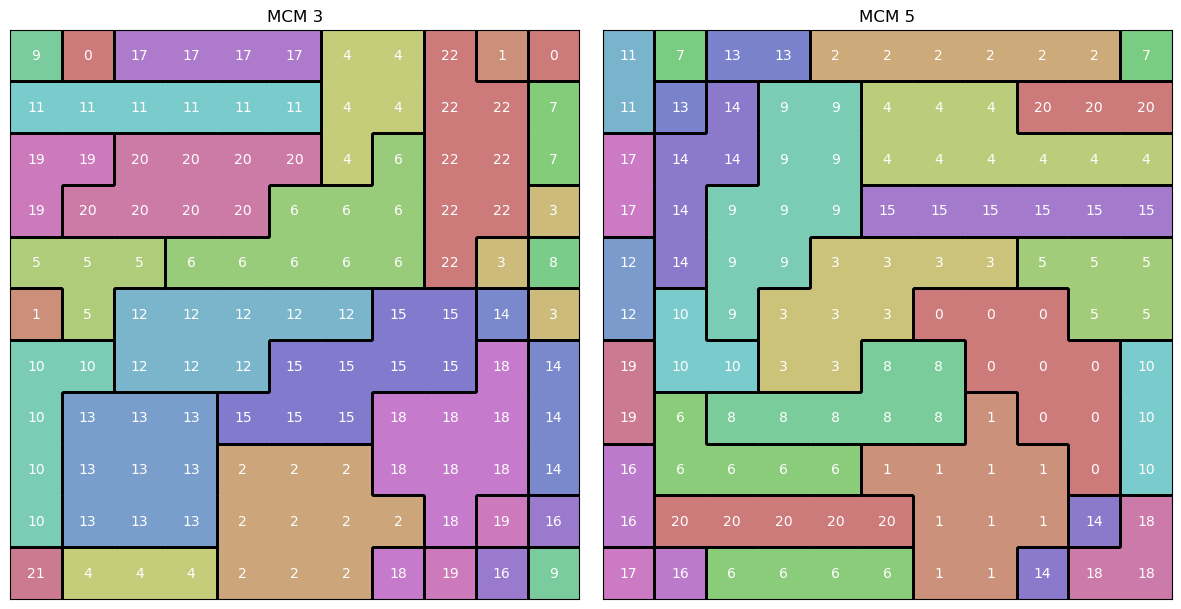

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

myplot.plot_communities(axs[0],mcm3_comms_map,"MCM 3")
myplot.plot_communities(axs[1],mcm5_comms_map,"MCM 5")

plt.tight_layout()
plt.show()

In [26]:
# # difference 3 vs. 5
# dif_35 = all_P_icc_3[:,:,[3,5]].mean(axis=1)
# dif_35 = np.diff(dif_35, axis=1).flatten()

# # difference in means class 3 vs. rest
# dif_3r = all_P_icc_3.mean(axis=1)
# dif_3r = dif_3r[:,3] - dif_3r.mean(axis=1)

In [27]:
# bias = (dif_35[comms]*100).astype(int) 
# absmax = np.abs(bias.flat[np.abs(bias).argmax()]) # scale axis
# # diff_map is difference in average probabilities of an ICC over all images of class 3 vs class 5
# # FIXME problem is that borders are not enough to indicate which cells are the same ICC because they must not be adjacent

# plt.figure()
# # plt.title("Bias of ICC probabilities in MCM 3 for class 3 vs. class 5.") # plt.title(" Higher values = higher avg P for an image of class 3.")
# plt.title("3 vs.5: Indicative ICCs in MCM 3")
# r = (np.mean(bias)+np.std(bias))
# drawing_cond = lambda x: np.abs(x) > r
# myplot.partition_map(plt.gca(),bias,bias,borders,drawing_cond=drawing_cond)
# plt.show()


 Notes on possible indicativity meaures
 - in the supreme court paper by Lee, they calculate the infuence of a supereme justice by calculating e.g., mutual inforamtion(this justice, vs court)
    Option 1: MI
    - MI(own vote, majority vote)
    - for us this would be pixel vote vs. average vote of MCM
        - would need threshold for probability maybe (.5 == majority vote equivalent)
    Option 2: Suseptability Gamma (defined in text)
    

    


- 121 x 121 matrix of membership of which pixels are part of which icc could be useful but only in the new basis, right now the communities are perfectly separated

In [28]:
# comms, 11x11 matrix of integer community labels
# all_P_icc_3, [iccs, images, category] = [x,5k,10] where the iccs are part of 1 MCM 


### ICC single vote against Average Vote mutual information plots.
- A "vote" is 1 if P(icc_i| this_image) >= 0.5, else 0.
- Votes are not adjusted for the number of pixels an icc spans

comparing MCMs 3 and 5 for seeing a 3 or a 5

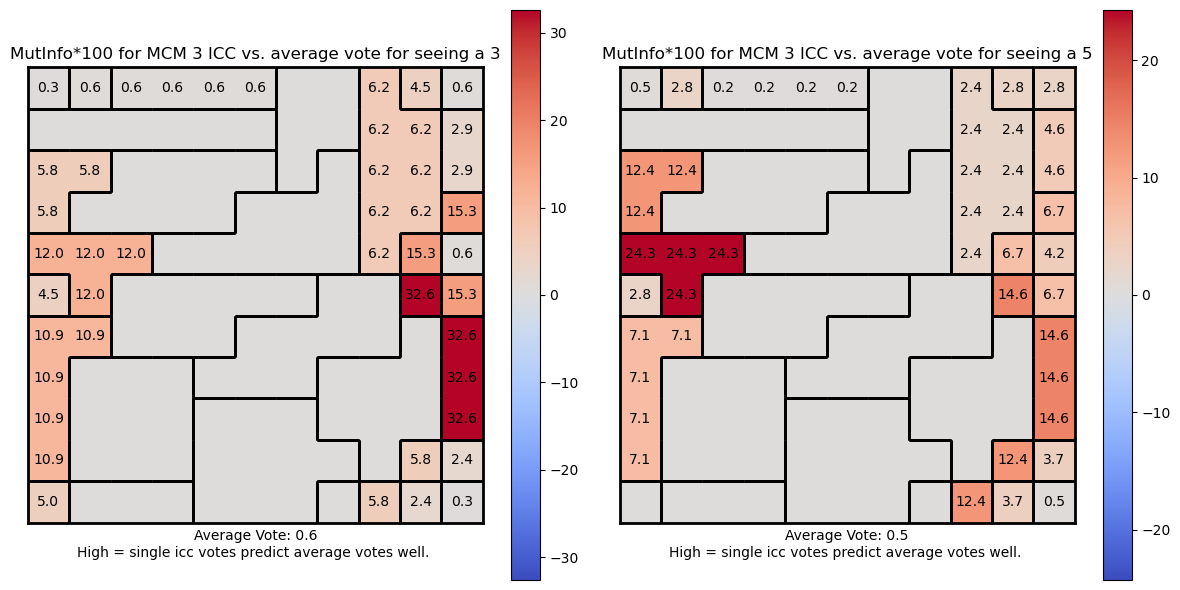

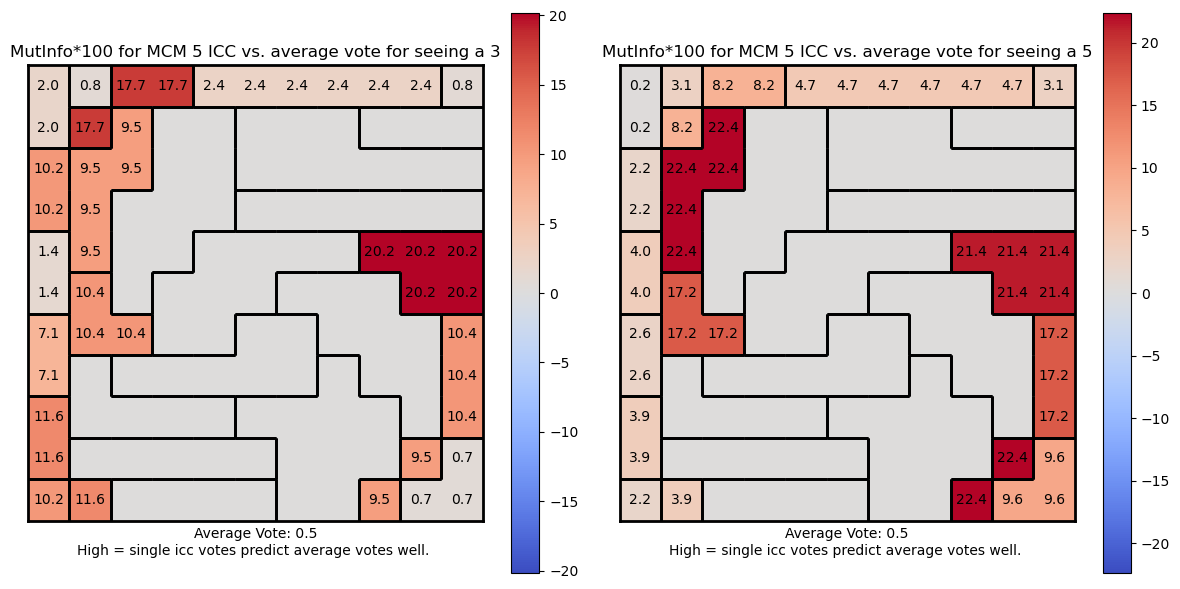

In [29]:
#  mutual information between MI(icc_vote, average_vote)
# NOTE: final MCM probability is product not sum so maybe average vote is not fair
# given a 3, calculate the MI(icc_vote, vs average vote)



selected = [3, 5]
myplot.compare_mcm_mutual_info_avg_vote(selected, all_P_icc_3,mcm3_comms_map,3)
myplot.compare_mcm_mutual_info_avg_vote(selected, all_P_icc_5,mcm5_comms_map,5)

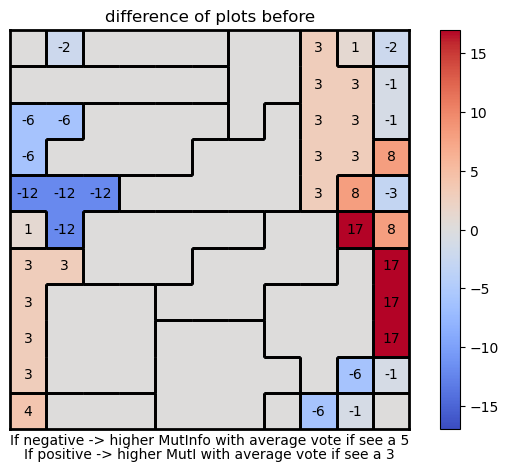

In [30]:
#  mutual information between MI(icc_vote, average_vote)
# NOTE: final MCM probability is product not sum so maybe average vote is not fair
# given a 3, calculate the MI(icc_vote, vs average vote)
from sklearn.metrics import normalized_mutual_info_score

selected = [3, 5]
nr_comms = np.max(mcm3_comms_map)+1

plt.figure()
# plt.title("Difference in MI class3 -class5 for icc in MCM3 vs. average")
plt.title("difference of plots before") 
P_m3_c3 = all_P_icc_3[:,:,3]
P_m3_c5 = all_P_icc_3[:,:,5]
# Average vs. Individual predicted label
out1 = np.zeros(nr_comms)
out2 = np.zeros(nr_comms)
for i in range(nr_comms):
    out1[i]=normalized_mutual_info_score(np.where(P_m3_c3.mean(axis=0)>=0.5,1,0),np.where(P_m3_c3[i,:]>=0.5,1,0))
    out2[i]=normalized_mutual_info_score(np.where(P_m3_c5.mean(axis=0)>=0.5,1,0),np.where(P_m3_c5[i,:]>=0.5,1,0))

# mi_matrix = (out1[comms]*100).round(1)
mi_matrix = ((out1[mcm3_comms_map] -out2[mcm3_comms_map])*100).astype(int)
plt.text(5,11, f"If negative -> higher MutInfo with average vote if see a 5", ha="center", va="bottom") # note vote not adjusted for number of pixels
plt.text(5,11+0.4, f"If positive -> higher MutI with average vote if see a 3", ha="center", va="bottom") # note vote not adjusted for number of pixels

myplot.partition_map(plt.gca(),mi_matrix,mi_matrix,myplot.find_borders(mcm3_comms_map),drawing_cond=lambda x: x!=0)                        
plt.tight_layout()
plt.show()


 0 vs. 1 are very easy to classify

In [31]:
# for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
all_P_icc_0 = myplot.calculate_P_icc(P, all_MCM,0,n_variables, data_path,data_filename_format)
all_P_icc_1 = myplot.calculate_P_icc(P, all_MCM,1,n_variables, data_path,data_filename_format)


In [ ]:

mcm0_comms_map = myplot.generate_icc_comms_map(all_MCM[0])
mcm1_comms_map = myplot.generate_icc_comms_map(all_MCM[1])

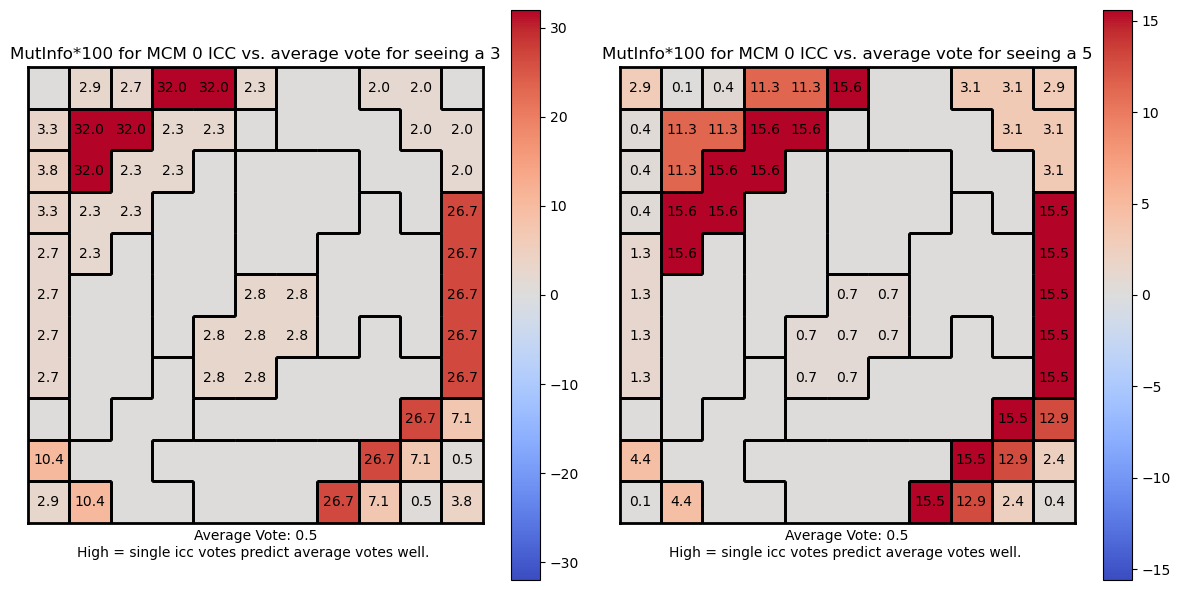

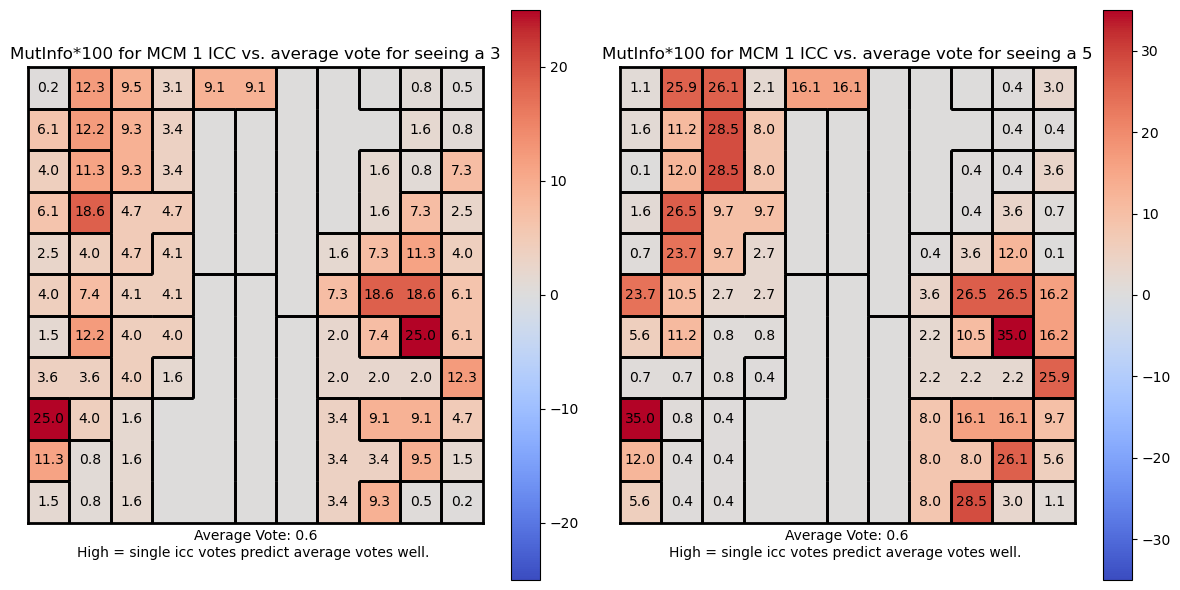

In [ ]:
myplot.compare_mcm_mutual_info_avg_vote(selected, all_P_icc_0, mcm0_comms_map,0)
myplot.compare_mcm_mutual_info_avg_vote(selected, all_P_icc_1, mcm1_comms_map,1)

In [ ]:
# need a co-occurance matrix of what it was called
# 121 by 121 of how destinctive that pixel is between 3 vs. 5

# 1 matrix = 1 image
# what icc these pixels are part of
